In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-test/Book1.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip")

In [4]:
print(train)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insul

In [5]:
import re
import string
# Removing special characters
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
train['comment_text'] = train['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [6]:
# marking comments without any tags as "clean"
tag_sums = train.iloc[:,2:].sum(axis=1)
train['clean'] = (tag_sums==0)

In [7]:
print('train shape:',train.shape)
train.head(7)

train shape: (159571, 9)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0,True
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0,True
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0,True
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,True
5,00025465d4725e87,congratulations from me as well use the to...,0,0,0,0,0,0,True
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0,False


In [8]:
# Selecting subset of columns
new_train = train[['comment_text', 'clean']]

# Displaying the subset DataFrame
new_train.head(10)

,comment_text,clean
0,explanation why the edits made under my userna...,True
1,d aww he matches this background colour i m s...,True
2,hey man i m really not trying to edit war it...,True
3,more i can t make any real suggestions on im...,True
4,you sir are my hero any chance you remember...,True
5,congratulations from me as well use the to...,True
6,cocksucker before you piss around on my work,False
7,your vandalism to the matt shirvington article...,True
8,sorry if the word nonsense was offensive to ...,True
9,alignment on this subject and which are contra...,True


In [9]:
new_train['clean']=new_train['clean'].astype(int)
new_train.head(10)

/tmp/ipykernel_34/1533770826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['clean']=new_train['clean'].astype(int)


,comment_text,clean
0,explanation why the edits made under my userna...,1
1,d aww he matches this background colour i m s...,1
2,hey man i m really not trying to edit war it...,1
3,more i can t make any real suggestions on im...,1
4,you sir are my hero any chance you remember...,1
5,congratulations from me as well use the to...,1
6,cocksucker before you piss around on my work,0
7,your vandalism to the matt shirvington article...,1
8,sorry if the word nonsense was offensive to ...,1
9,alignment on this subject and which are contra...,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

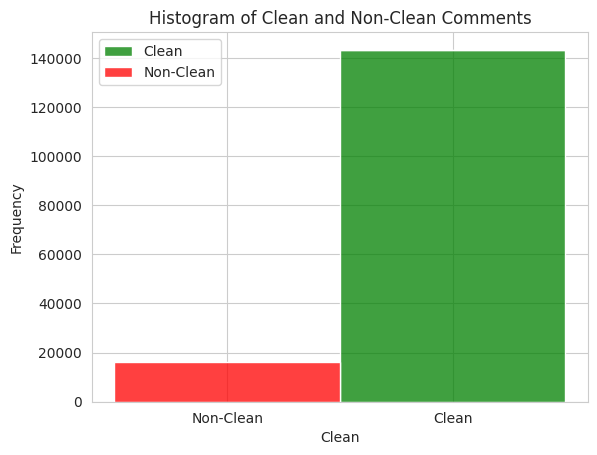

In [10]:
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot histogram
sns.histplot(data=new_train, x='clean', bins=2, hue='clean', palette={0: "red", 1: "green"}, multiple="stack")
plt.xlabel('Clean')
plt.ylabel('Frequency')
plt.title('Histogram of Clean and Non-Clean Comments')
plt.xticks([0.25, 0.75], ['Non-Clean', 'Clean'])
plt.legend(labels=['Clean', 'Non-Clean'])
plt.show()

In [11]:
# Count the number of clean and non-clean comments
clean_counts = new_train['clean'].value_counts()

# Print the counts
print("Number of clean comments:", clean_counts[1])
print("Number of non-clean comments:", clean_counts[0])


Number of clean comments: 143346
Number of non-clean comments: 16225


In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Random oversampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(new_train[['comment_text']], new_train['clean'])

balanced_data_oversampled = pd.DataFrame({'comment_text': X_over.squeeze(), 'clean': y_over})

# Random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(new_train[['comment_text']], new_train['clean'])

balanced_data_undersampled = pd.DataFrame({'comment_text': X_under.squeeze(), 'clean': y_under})

# Checking the number of samples in each class after balancing
print("Number of samples in each class after oversampling:")
print(balanced_data_oversampled['clean'].value_counts())

print("\nNumber of samples in each class after undersampling:")
print(balanced_data_undersampled['clean'].value_counts())

Number of samples in each class after oversampling:
clean
1    143346
0    143346
Name: count, dtype: int64

Number of samples in each class after undersampling:
clean
0    16225
1    16225
Name: count, dtype: int64


In [13]:
# Assuming you have a DataFrame named 'balanced_data_oversampled'
print(len(balanced_data_oversampled))
print(len(balanced_data_undersampled))

286692
32450


In [14]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Define a function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

In [15]:
balanced_data_oversampled['comment_text'] = balanced_data_oversampled['comment_text'].apply(preprocess_text)
balanced_data_oversampled.head(5)

,comment_text,clean
0,explanation edits made username hardcore metal...,1
1,aww matches background colour seemingly stuck ...,1
2,hey man really trying edit war guy constantly ...,1
3,make real suggestions improvement wondered sec...,1
4,sir hero chance remember page,1


In [16]:
balanced_data_undersampled['comment_text'] = balanced_data_undersampled['comment_text'].apply(preprocess_text)
balanced_data_undersampled.head(5)

,comment_text,clean
6,cocksucker piss around work,0
12,hey talk exclusive group wp talibans good dest...,0
16,bye look come think comming back tosser,0
42,gay antisemmitian archangel white tiger meow g...,0
43,fuck filthy mother ass dry,0


In [17]:
check=pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
check.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [18]:
import re
import string
# Removing special characters
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
check['comment_text'] = check['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is loaded into a variable named 'balanced_data'

# Splitting the dataset into training and testing sets
X = balanced_data_undersampled['comment_text']
y = balanced_data_undersampled['clean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logistic_regression_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(random_state=42))
])

logistic_regression_model.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)

print("Logistic Regression Accuracy - Under Sampled Data:", logistic_regression_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_regression_pred))

#naive bayes
naive_bayes_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

naive_bayes_model.fit(X_train, y_train)
naive_bayes_pred = naive_bayes_model.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)

print("\nNaive Bayes Accuracy - Under Sampled Data:", naive_bayes_accuracy)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, naive_bayes_pred))

#svm model
svm_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear', random_state=42))
])

svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("\nSVM Accuracy - Under Sampled:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

Logistic Regression Accuracy - Under Sampled Data: 0.8930662557781202
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      3261
           1       0.87      0.92      0.90      3229

    accuracy                           0.89      6490
   macro avg       0.89      0.89      0.89      6490
weighted avg       0.89      0.89      0.89      6490


Naive Bayes Accuracy - Under Sampled Data: 0.8856702619414484
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3261
           1       0.88      0.90      0.89      3229

    accuracy                           0.89      6490
   macro avg       0.89      0.89      0.89      6490
weighted avg       0.89      0.89      0.89      6490


SVM Accuracy - Under Sampled: 0.8996918335901387
SVM Classification Report:
              precision    recall  f1-score   support

   

In [20]:
import pandas as pd

# Extracting a random sample of 100 comments from the check DataFrame
random_comments = check['comment_text'].sample(n=100, random_state=42)

# Predicting using the trained logistic regression model
logistic_regression_pred_new = logistic_regression_model.predict(random_comments)

# Creating a DataFrame to display comments and predictions side by side
result_df = pd.DataFrame({
    'Comment': random_comments,
    'Prediction': logistic_regression_pred_new
})

# Printing the DataFram

result_df.head(10)

,Comment,Prediction
127433,sky city hello i noticed that you...,1
31486,specifically allied forces suffered ap...,1
69644,you know what i think you re just insecur...,1
127569,lol lollolololoolollololollol ...,0
127235,he is not a bad guy he is a sexy guy and his b...,0
12160,she was fucked by someone with a big cock,0
88946,sockpuppetry case align lef...,1
12405,rethink would you care to rethink th...,1
141813,my nazi bluelink list,0
107633,i have been unable to find any confirmation th...,1


In [21]:
import pandas as pd

# Extracting a random sample of 100 comments from the check DataFrame
random_comments = check['comment_text'].sample(n=100, random_state=42)

# Predicting using the trained Naive Bayes model
naive_bayes_pred_new = naive_bayes_model.predict(random_comments)

# Creating a DataFrame to display comments and predictions side by side
result_df_nb = pd.DataFrame({
    'Comment': random_comments,
    'Prediction': naive_bayes_pred_new
})

# Printing the DataFrame
print("Predictions for new data (Naive Bayes):")
print(result_df_nb.head(10))


Predictions for new data (Naive Bayes):
                                                  Comment  Prediction
127433     sky city       hello     i noticed that you...           1
31486          specifically  allied forces suffered ap...           1
69644       you know what  i think you re just insecur...           1
127569          lol       lollolololoolollololollol   ...           0
127235  he is not a bad guy he is a sexy guy and his b...           0
12160           she was fucked by someone with a big cock           0
88946           sockpuppetry case          align   lef...           1
12405      rethink        would you care to rethink th...           1
141813                           my nazi bluelink list              0
107633  i have been unable to find any confirmation th...           1


In [22]:
import pandas as pd

# Extracting a random sample of 100 comments from the check DataFrame
random_comments = check['comment_text'].sample(n=100, random_state=42)

# Predicting using the trained SVM model
svm_pred_new = svm_model.predict(random_comments)

# Creating a DataFrame to display comments and predictions side by side
result_df_svm = pd.DataFrame({
    'Comment': random_comments,
    'Prediction': svm_pred_new
})

# Printing the DataFrame
print("Predictions for new data (SVM):")
print(result_df_svm.head(10))


Predictions for new data (SVM):
                                                  Comment  Prediction
127433     sky city       hello     i noticed that you...           1
31486          specifically  allied forces suffered ap...           1
69644       you know what  i think you re just insecur...           1
127569          lol       lollolololoolollololollol   ...           0
127235  he is not a bad guy he is a sexy guy and his b...           0
12160           she was fucked by someone with a big cock           0
88946           sockpuppetry case          align   lef...           1
12405      rethink        would you care to rethink th...           1
141813                           my nazi bluelink list              0
107633  i have been unable to find any confirmation th...           1


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is loaded into a variable named 'balanced_data'

# Splitting the dataset into training and testing sets
X = new_train['comment_text']
y = new_train['clean']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logistic_regression_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(random_state=42))
])

logistic_regression_model.fit(X1_train, y1_train)
logistic_regression_pred = logistic_regression_model.predict(X1_test)
logistic_regression_accuracy = accuracy_score(y1_test, logistic_regression_pred)

print("Logistic Regression Accuracy - =Imbalanced Data:", logistic_regression_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y1_test, logistic_regression_pred))


naive_bayes_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

naive_bayes_model.fit(X1_train, y1_train)
naive_bayes_pred = naive_bayes_model.predict(X1_test)
naive_bayes_accuracy = accuracy_score(y1_test, naive_bayes_pred)

print("\nNaive Bayes Accuracy - Imbalanaced Data:", naive_bayes_accuracy)
print("Naive Bayes Classification Report:")
print(classification_report(y1_test, naive_bayes_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy - =Imbalanced Data: 0.9570421431928561
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      3244
           1       0.96      0.99      0.98     28671

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915


Naive Bayes Accuracy - Imbalanaced Data: 0.9178442738524205
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.19      0.32      3244
           1       0.92      1.00      0.96     28671

    accuracy                           0.92     31915
   macro avg       0.96      0.60      0.64     31915
weighted avg       0.92      0.92      0.89     31915



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is loaded into a variable named 'balanced_data'

# Splitting the dataset into training and testing sets
X = balanced_data_oversampled['comment_text']
y = balanced_data_oversampled['clean']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logistic_regression_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(random_state=42))
])

logistic_regression_model.fit(X2_train, y2_train)
logistic_regression_pred = logistic_regression_model.predict(X2_test)
logistic_regression_accuracy = accuracy_score(y2_test, logistic_regression_pred)

print("Logistic Regression Accuracy - oversampled:", logistic_regression_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y2_test, logistic_regression_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy - oversampled: 0.9585447949911927
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     28898
           1       0.96      0.95      0.96     28441

    accuracy                           0.96     57339
   macro avg       0.96      0.96      0.96     57339
weighted avg       0.96      0.96      0.96     57339



In [25]:
naive_bayes_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

naive_bayes_model.fit(X2_train, y2_train)
naive_bayes_pred = naive_bayes_model.predict(X2_test)
naive_bayes_accuracy = accuracy_score(y2_test, naive_bayes_pred)

print("\nNaive Bayes Accuracy - oversampled :", naive_bayes_accuracy)
print("Naive Bayes Classification Report:")
print(classification_report(y2_test, naive_bayes_pred))


Naive Bayes Accuracy - oversampled : 0.9167582273845027
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     28898
           1       0.94      0.89      0.91     28441

    accuracy                           0.92     57339
   macro avg       0.92      0.92      0.92     57339
weighted avg       0.92      0.92      0.92     57339



In [26]:
val=pd.read_csv("/kaggle/input/new-test/Book1.csv")
val.head

<bound method NDFrame.head of                              comment_text  clean
0          Your positivity is infectious!      1
1               You're doing a great job!      1
2        Your efforts don't go unnoticed.      1
3                  You're always so kind.      1
4                Thank you for your help.      1
5        Your efforts don't go unnoticed.      1
6      You bring joy to those around you.      1
7   You're a valuable member of the team.      1
8     You're a valuable part of the team.      1
9                 You're a good listener.      1
10                 You're always so kind.      1
11      I really appreciate your support.      1
12                 Keep up the good work!      1
13           I admire your determination.      1
14                        ⁠fucking bitch       0
15                   ⁠you stupid asshole       0
16                      7. ⁠fucking moron      0
17                 8. ⁠Obnoxious bastards      0
18                      9. Fucking idio

In [27]:
val['comment_text'] = val['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [28]:
# Load the new test data

# Extract the input feature (comment_text) and target variable (clean) from the new data
X_val = val['comment_text']
y_val = val['clean']

# Make predictions on the new test data using the trained logistic regression model
val_predictions = logistic_regression_model.predict(X_val)

# Calculate the accuracy score by comparing the predictions with the actual target variable
val_accuracy = accuracy_score(y_val, val_predictions)
print("Accuracy of Logistic Regression on the new test dataset (val):", val_accuracy)

# Print the classification report
print("Classification Report on the new test dataset (val):")
print(classification_report(y_val, val_predictions))

# Evaluate models on the new test dataset ('val')

X_val = val['comment_text']
y_val = val['clean']

# Naive Bayes
val_naive_bayes_predictions = naive_bayes_model.predict(X_val)
val_naive_bayes_accuracy = accuracy_score(y_val, val_naive_bayes_predictions)
print("\nAccuracy of Naive Bayes on the new test dataset (val):", val_naive_bayes_accuracy)
print("Classification Report of Naive Bayes on the new test dataset (val):")
print(classification_report(y_val, val_naive_bayes_predictions))

# SVM
val_svm_predictions = svm_model.predict(X_val)
val_svm_accuracy = accuracy_score(y_val, val_svm_predictions)
print("\nAccuracy of SVM on the new test dataset (val):", val_svm_accuracy)
print("Classification Report of SVM on the new test dataset (val):")
print(classification_report(y_val, val_svm_predictions))

Accuracy of Logistic Regression on the new test dataset (val): 1.0
Classification Report on the new test dataset (val):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34


Accuracy of Naive Bayes on the new test dataset (val): 0.8823529411764706
Classification Report of Naive Bayes on the new test dataset (val):
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.71      0.83        14

    accuracy                           0.88        34
   macro avg       0.92      0.86      0.87        34
weighted avg       0.90      0.88      0.88        34


Accuracy of SVM on the new test dataset (val): 1.0
Classification Report of SVM on

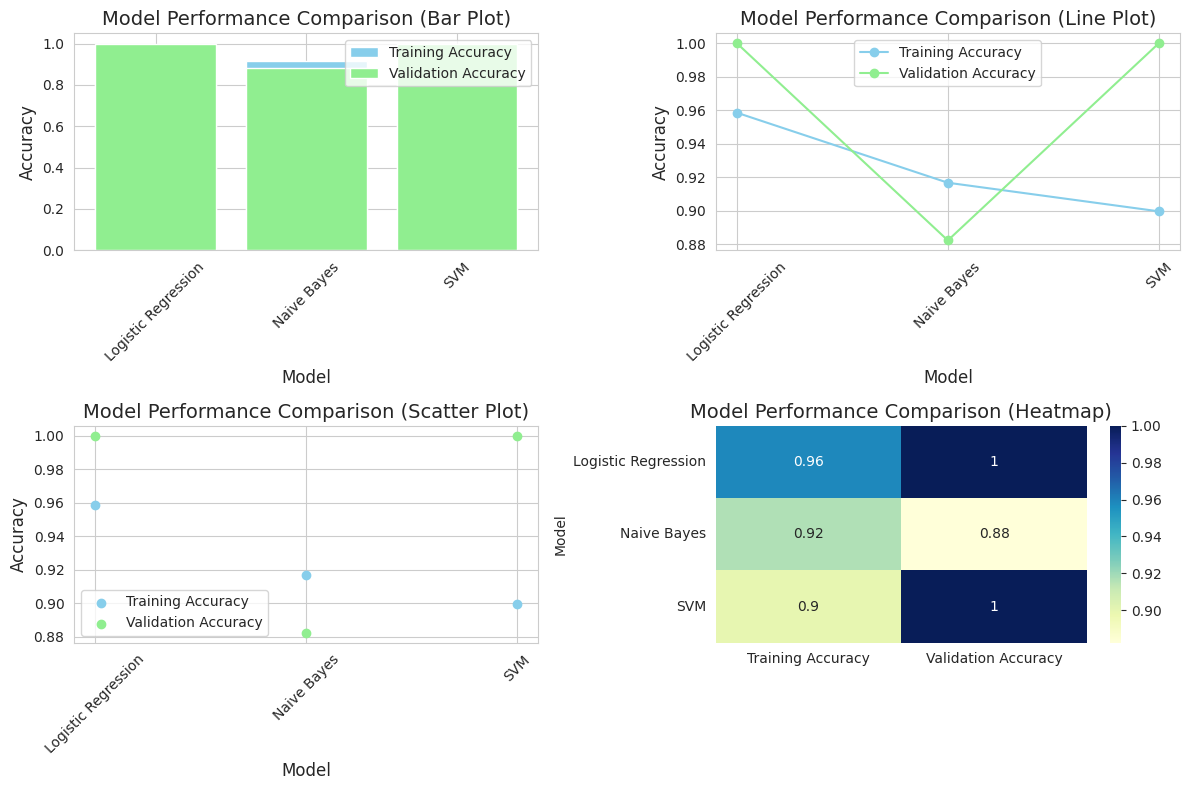

Model Performance Comparison Table:
                 Model  Training Accuracy  Validation Accuracy
0  Logistic Regression           0.958545             1.000000
1          Naive Bayes           0.916758             0.882353
2                  SVM           0.899692             1.000000


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of model names
model_names = ['Logistic Regression', 'Naive Bayes', 'SVM']
# Create lists to store the accuracies for each model
train_accuracies = [logistic_regression_accuracy, naive_bayes_accuracy, svm_accuracy]
val_accuracies = [val_accuracy, val_naive_bayes_accuracy, val_svm_accuracy]
# Create a dictionary to store the accuracies for the comparison table
model_accuracies = {
'Model': model_names,
'Training Accuracy': train_accuracies,
'Validation Accuracy': val_accuracies
}
# Convert the dictionary to a DataFrame
model_accuracies_df = pd.DataFrame(model_accuracies)
# Convert the 'Model' column to categorical data type
model_accuracies_df['Model'] = model_accuracies_df['Model'].astype('category')
# Plot the accuracies
plt.figure(figsize=(12, 8))
# Bar plot
plt.subplot(2, 2, 1)
plt.bar(model_names, train_accuracies, color='skyblue', label='Training Accuracy')
plt.bar(model_names, val_accuracies, color='lightgreen', label='Validation Accuracy')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison (Bar Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
# Line plot
plt.subplot(2, 2, 2)
plt.plot(model_names, train_accuracies, marker='o', color='skyblue', label='Training Accuracy')
plt.plot(model_names, val_accuracies, marker='o', color='lightgreen', label='Validation Accuracy')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison (Line Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
# Scatter plot
plt.subplot(2, 2, 3)
plt.scatter(model_names, train_accuracies, color='skyblue', label='Training Accuracy')
plt.scatter(model_names, val_accuracies, color='lightgreen', label='Validation Accuracy')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison (Scatter Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
# Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(model_accuracies_df.set_index('Model'), annot=True, cmap='YlGnBu')
plt.title('Model Performance Comparison (Heatmap)', fontsize=14)
plt.tight_layout()
plt.show()
# Print the comparison table
print('Model Performance Comparison Table:')
print(model_accuracies_df)